In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

## 1 首先加载数据集

In [2]:
csv_path='D:\MyBlogs\Machine Learning Project Simulation'
train_data=pd.read_csv(os.path.join(csv_path,'train.csv'))
test_data=pd.read_csv(os.path.join(csv_path,'test.csv'))

## 2 分析数据

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age,Cabin,Embarked存在数据缺失的情况

In [29]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


只有Pclass(Ticket class)是分类属性

In [ ]:
train_data['Ticket'].value_counts()

In [34]:
train_data['Cabin'].value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F33                3
D                  3
F2                 3
C22 C26            3
E101               3
D20                2
C124               2
C65                2
B51 B53 B55        2
C68                2
C92                2
C78                2
C83                2
B22                2
B49                2
B28                2
E44                2
B77                2
C126               2
B57 B59 B63 B66    2
B5                 2
E67                2
E24                2
B58 B60            2
B18                2
C123               2
D33                2
                  ..
E31                1
A19                1
D30                1
B82 B84            1
D19                1
D6                 1
E34                1
B3                 1
D47                1
A34                1
D28                1
C101               1
C70                1
B102               1
C95                1
C91                1
C30          

Cabin(Cabin number)是分类属性

In [ ]:
train_data['Embarked'].value_counts()

查看每个属性的统计直方图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA102BB9B0>,
      dtype=object)

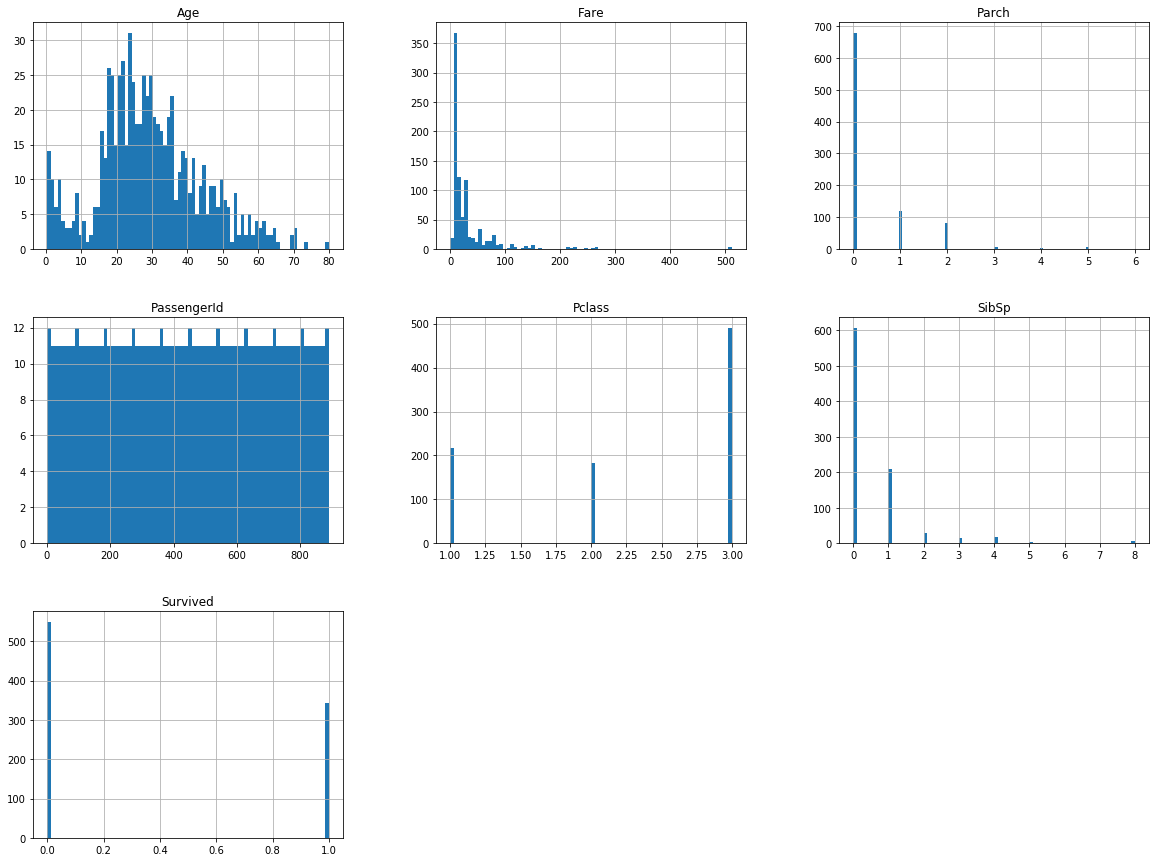

In [4]:
train_data.hist(bins=80,figsize=(20,15))

数据可视化

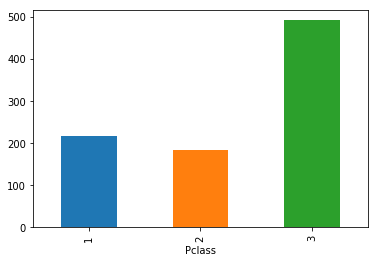

In [53]:
t0=train_data.groupby('Pclass').PassengerId.count().plot(kind='bar')

上图是不同Pclass的乘客的数量分布

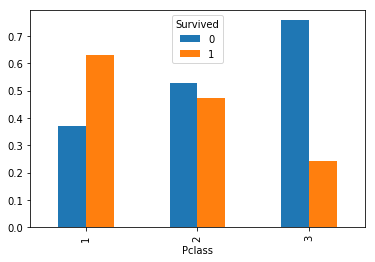

In [47]:
t1=pd.crosstab(train_data.Pclass, train_data.Survived,margins=False)
t2=t1.div(t1.sum(1).astype(float),axis=0).plot(kind='bar')

从各个群体的存活率上看，Pclass为3的群体是最低的

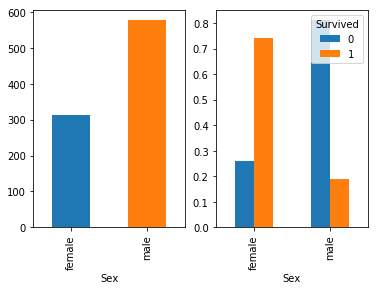

In [63]:
#train_data.groupby('Sex').PassengerId.count().plot(kind='bar',subplots=True)
fig = plt.figure()
f1= fig.add_subplot(1,2,1) 
f2= fig.add_subplot(1,2,2) 
train_data.groupby('Sex').PassengerId.count().plot(kind='bar',ax=f1)
t1=pd.crosstab(train_data.Sex, train_data.Survived,margins=False)
t2=t1.div(t1.sum(1).astype(float),axis=0).plot(kind='bar',ax=f2)

从sex上看，女性的存活率远大于男性

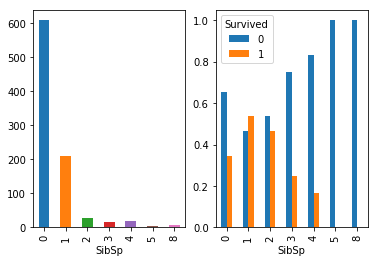

In [64]:
fig = plt.figure()
f1= fig.add_subplot(1,2,1) 
f2= fig.add_subplot(1,2,2) 
train_data.groupby('SibSp').PassengerId.count().plot(kind='bar',ax=f1)
t1=pd.crosstab(train_data.SibSp, train_data.Survived,margins=False)
t2=t1.div(t1.sum(1).astype(float),axis=0).plot(kind='bar',ax=f2)

从SibSp上看，存在1到2个兄弟姐妹或配偶的乘客存活率高一些, 这个属性在2以上的乘客数量相对较少，因此后续可能可以将这个属性转变一下，就分为0和1

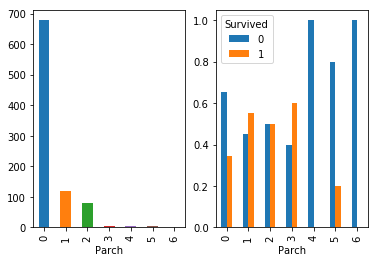

In [65]:
fig = plt.figure()
f1= fig.add_subplot(1,2,1) 
f2= fig.add_subplot(1,2,2) 
train_data.groupby('Parch').PassengerId.count().plot(kind='bar',ax=f1)
t1=pd.crosstab(train_data.Parch, train_data.Survived,margins=False)
t2=t1.div(t1.sum(1).astype(float),axis=0).plot(kind='bar',ax=f2)

Parch属性的分布情况与SibSp类似

考虑实际场景，Ticket的分布结果没有参考意义

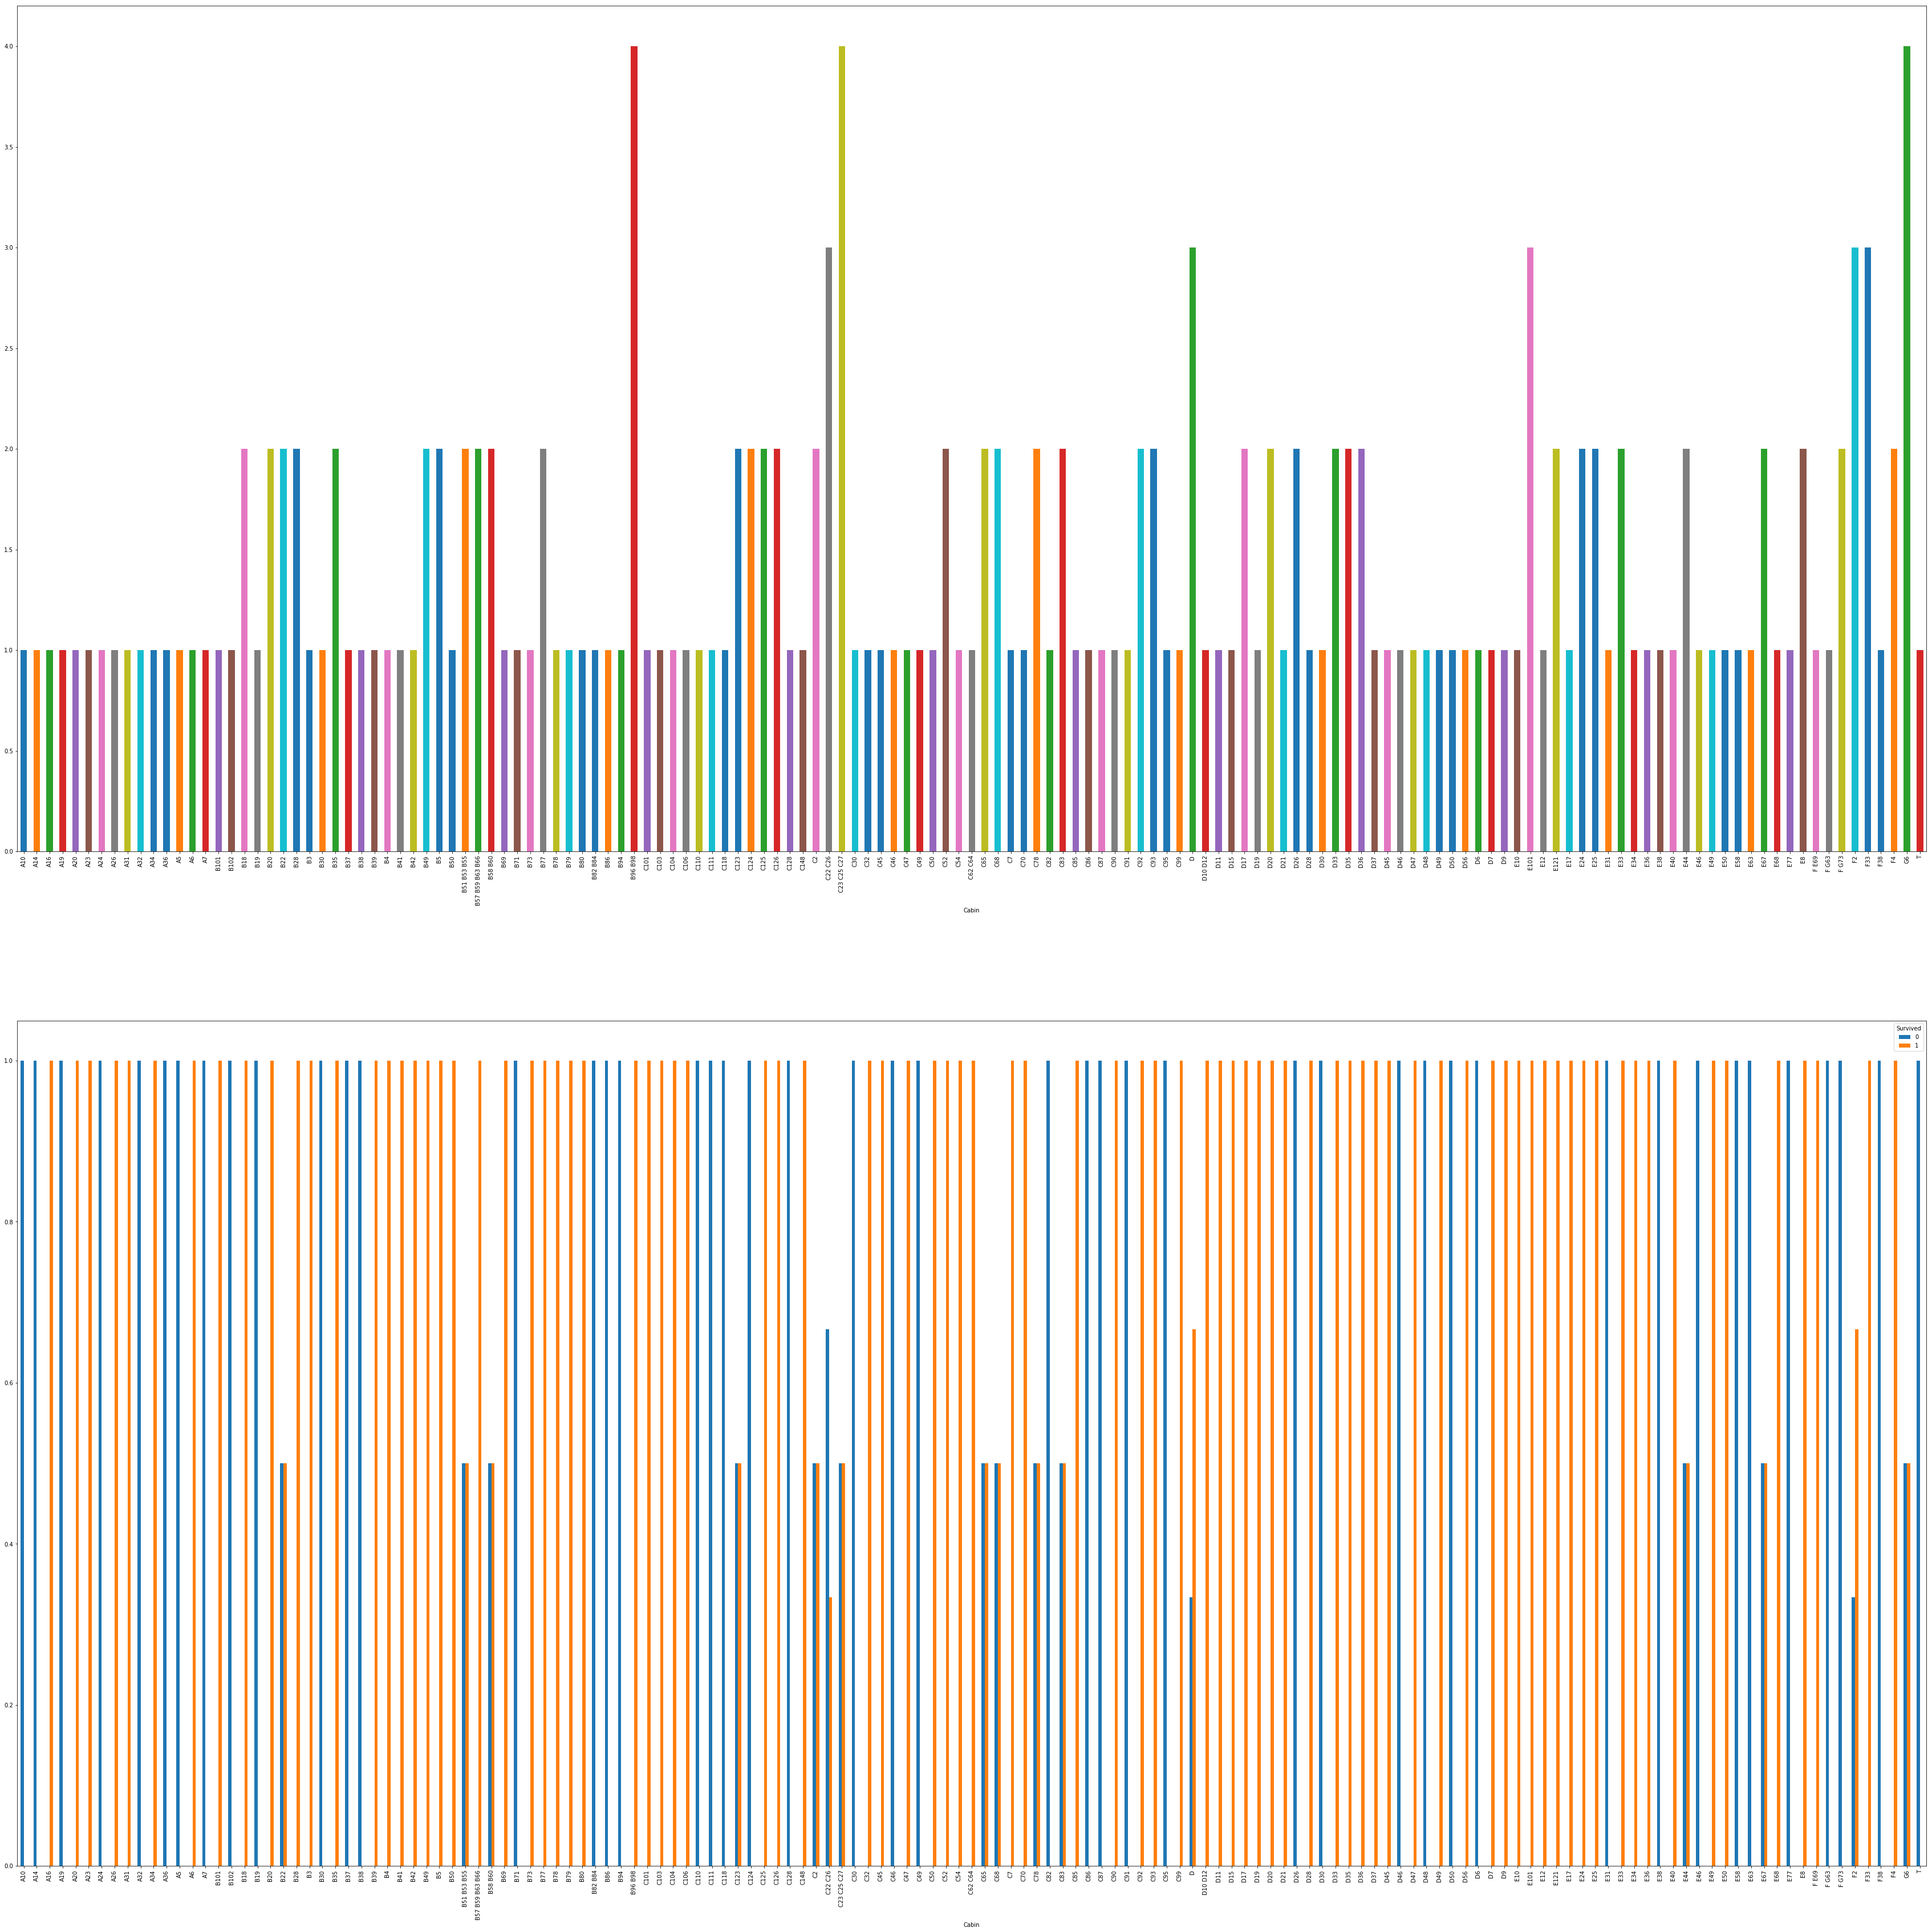

In [40]:
fig = plt.figure()
f1= fig.add_subplot(2,1,1) 
f2= fig.add_subplot(2,1,2) 
figsize=(60,60)
train_data.groupby('Cabin').PassengerId.count().plot(kind='bar',ax=f1,figsize=figsize)
t1=pd.crosstab(train_data.Cabin, train_data.Survived,margins=False)
t2=t1.div(t1.sum(1).astype(float),axis=0).plot(kind='bar',ax=f2,figsize=figsize)

同样，Cabin也对分类决策没有大的影响

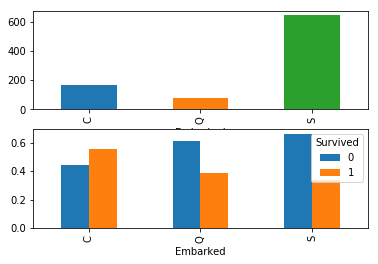

In [72]:
fig = plt.figure()
f1= fig.add_subplot(2,1,1) 
f2= fig.add_subplot(2,1,2) 
train_data.groupby('Embarked').PassengerId.count().plot(kind='bar',ax=f1,)
t1=pd.crosstab(train_data.Embarked, train_data.Survived,margins=False)
t2=t1.div(t1.sum(1).astype(float),axis=0).plot(kind='bar',ax=f2,)

在Embarked的分布上，为C的乘客存活率更大一些，但是C和Q的人数比S小很多，所以这个属性的差异性不太好判断

分析下年龄Age的分布情况。Age是跨度较大的连续值属性，直接做直方图统计并不合适，因此根据Age的大小划分几个年龄段来统计,参照上面的统计直方图，以20岁进行划分(0-20,21-40,41-60,61-?)

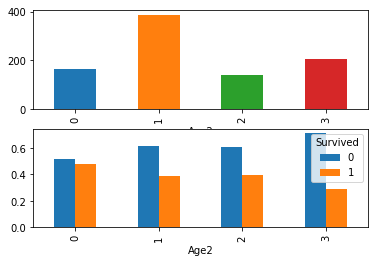

In [24]:
try:
    train_data=train_data.drop('Age2',axis=1,inplace=False)
except:
    pass
age2=[]
for index, row in train_data.iterrows():
    if row['Age']>=0 and row['Age']<20:
        age2.append(0)
    elif row['Age']>=20 and row['Age']<40:
        age2.append(1)
    elif row['Age']>=40 and row['Age']<60:
        age2.append(2)
    else :
        age2.append(3) 
train_data.insert(0,'Age2',age2)

fig = plt.figure()
f1= fig.add_subplot(2,1,1) 
f2= fig.add_subplot(2,1,2) 
train_data.groupby('Age2').PassengerId.count().plot(kind='bar',ax=f1,)
t1=pd.crosstab(train_data.Age2, train_data.Survived,margins=False)
t2=t1.div(t1.sum(1).astype(float),axis=0).plot(kind='bar',ax=f2,)

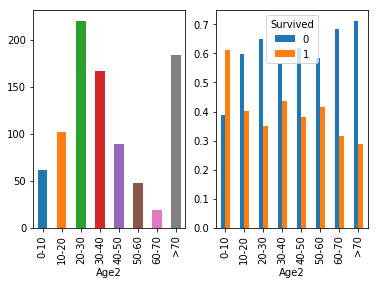

In [27]:
try:
    train_data=train_data.drop('Age2',axis=1,inplace=False)
except:
    pass
age2=[]
for index, row in train_data.iterrows():
    if row['Age']>=0 and row['Age']<10:
        age2.append('0-10')
    elif row['Age']>=10 and row['Age']<20:
        age2.append('10-20')
    elif row['Age']>=20 and row['Age']<30:
        age2.append('20-30')
    elif row['Age']>=30 and row['Age']<40:
        age2.append('30-40')
    elif row['Age']>=40 and row['Age']<50:
        age2.append('40-50')
    elif row['Age']>=50 and row['Age']<60:
        age2.append('50-60')
    elif row['Age']>=60 and row['Age']<70:
        age2.append('60-70')
    else:
        age2.append('>70')
train_data.insert(0,'Age2',age2)

fig = plt.figure()
f1= fig.add_subplot(1,2,1) 
f2= fig.add_subplot(1,2,2) 
train_data.groupby('Age2').PassengerId.count().plot(kind='bar',ax=f1,)
t1=pd.crosstab(train_data.Age2, train_data.Survived,margins=False)
t2=t1.div(t1.sum(1).astype(float),axis=0).plot(kind='bar',ax=f2,)

从分布结果看，年纪小的乘客存活率相对较大，年纪大的乘客数量较大，但是存活率较低

类似的，分析一下Fare属性的分布情况

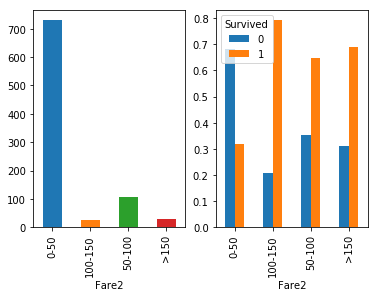

In [33]:
try:
    train_data=train_data.drop('Fare2',axis=1,inplace=False)
except:
    pass
fare2=[]
for index, row in train_data.iterrows():
    if row['Fare']>=0 and row['Fare']<50:
        fare2.append('0-50')
    elif row['Fare']>=50 and row['Fare']<100:
        fare2.append('50-100')
    elif row['Fare']>=100 and row['Fare']<150:
        fare2.append('100-150')
    else:
        fare2.append('>150')
train_data.insert(0,'Fare2',fare2)

fig = plt.figure()
f1= fig.add_subplot(1,2,1) 
f2= fig.add_subplot(1,2,2) 
train_data.groupby('Fare2').PassengerId.count().plot(kind='bar',ax=f1,)
t1=pd.crosstab(train_data.Fare2, train_data.Survived,margins=False)
t2=t1.div(t1.sum(1).astype(float),axis=0).plot(kind='bar',ax=f2,)

可以很明显地看到，Fare值高的乘客的存活率更高

## 3 结论

 1 所有属性中，Age,Pclass,Sex,SibSp,Parch,Fare是对最终决策有较大影响的，而Name,Cabin和Ticket则对决策没有太多影响，因此可以将这三个属性剔除;

 2 SibSp和Parch可以转换成类别属性

 3 某些属性存在缺失值，需要填充